In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt

1 Пункт

In [2]:

data = pd.read_excel("ENB2012_data.xlsx")

# Количество строк данных
total_rows = len(data)

# Размер тестового набора (например, 20%)
test_size = 0.2

# Рассчитаем количество строк в тестовом наборе
test_rows = int(total_rows * test_size)

# Получим случайные индексы строк для тестового набора
test_indices = np.random.choice(data.index, size=test_rows, replace=False)

# Создадим тестовый набор данных
test_data = data.loc[test_indices]

# Создадим обучающий набор данных, удалив строки, которые уже есть в тестовом наборе
train_data = data.drop(test_indices)

# Сохраним обучающий и тестовый наборы данных в CSV файлы
train_data.to_csv("train_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

# Посмотрим на размеры обучающего и тестового наборов данных
print("Размер обучающего набора данных:", len(train_data))
print("Размер тестового набора данных:", len(test_data))


Размер обучающего набора данных: 615
Размер тестового набора данных: 153


2 Пункт

Mean Squared Error: 9.783284470826382
Coefficient of Determination: 0.8986491829018695


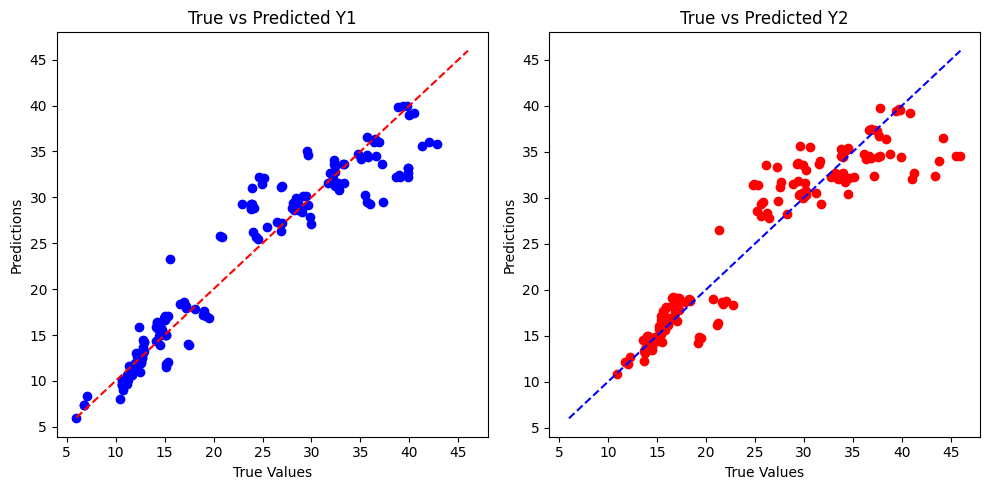

In [3]:


# Загрузка данных из CSV файла
train_data = pd.read_csv("train_data.csv")

# Разделение предикторов (X) и целевых переменных (Y)
X_train = train_data.drop(columns=["Y1", "Y2"])  # Удаляем столбцы с целевыми переменными
Y_train = train_data[["Y1", "Y2"]]

# Создание объекта линейной регрессии
regr = LinearRegression()

# Обучение модели на обучающих данных
regr.fit(X_train, Y_train)

# Загрузка данных для тестирования
test_data = pd.read_csv("test_data.csv")
X_test = test_data.drop(columns=["Y1", "Y2"])
Y_test = test_data[["Y1", "Y2"]]

# Предсказание на тестовых данных
Y_pred = regr.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("Coefficient of Determination:", r2)

# Визуализация результатов
plt.figure(figsize=(10, 5))

# Для Y1
plt.subplot(1, 2, 1)
plt.scatter(Y_test.iloc[:, 0], Y_pred[:, 0], color='blue')
plt.plot([Y_test.min().min(), Y_test.max().max()], [Y_test.min().min(), Y_test.max().max()], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Y1")

# Для Y2
plt.subplot(1, 2, 2)
plt.scatter(Y_test.iloc[:, 1], Y_pred[:, 1], color='red')
plt.plot([Y_test.min().min(), Y_test.max().max()], [Y_test.min().min(), Y_test.max().max()], color='blue', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Y2")

plt.tight_layout()
plt.show()


3 пункт

In [4]:


# Загрузка данных из CSV файла
test_data = pd.read_csv("test_data.csv")

# Разделение предикторов (X) и целевых переменных (Y)
X_test = test_data.drop(columns=["Y1", "Y2"])
Y_test = test_data[["Y1", "Y2"]]

# Загрузка обученной модели
regr = LinearRegression()
regr.fit(X_train, Y_train)

# Предсказание на тестовых данных
Y_pred = regr.predict(X_test)

# Оценка качества модели на тестовой выборке
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("Coefficient of Determination:", r2)


Mean Squared Error: 9.783284470826382
Coefficient of Determination: 0.8986491829018695


4 пункт

In [5]:
plt.figure(figsize=(18, 10))

# Проход по разным степеням полинома
for i, degree in enumerate(10, 1):
    # Создание полиномиальных признаков и линейной регрессии
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ])

    # Обучение модели
    pipeline.fit(X_train[:, np.newaxis], y_train)
    
    # Оценка на обучающем наборе данных
    y_train_pred = pipeline.predict(X_train[:, np.newaxis])
    
    # Оценка на тестовом наборе данных
    y_test_pred = pipeline.predict(X_test[:, np.newaxis])
    
    # Вычисление среднеквадратичной ошибки на обучающей и тестовой выборках
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Вычисление коэффициента детерминации на обучающей и тестовой выборках
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Построение графика
    plt.subplot(3, 4, i)
    plt.plot(X, true_fun(X), label="True function")
    plt.scatter(X_train, y_train, edgecolor='b', s=20, label="Train Samples")
    plt.scatter(X_test, y_test, edgecolor='r', s=20, label="Test Samples")
    plt.plot(X, pipeline.predict(X[:, np.newaxis]), label="Model", color='orange')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Degree {degree}\nTrain MSE = {train_mse:.2f}, Train R^2 = {train_r2:.2f}\nTest MSE = {test_mse:.2f}, Test R^2 = {test_r2:.2f}")
    plt.legend()

plt.tight_layout()
plt.show()




NameError: name 'degrees' is not defined

<Figure size 1800x1000 with 0 Axes>

5 Пункт

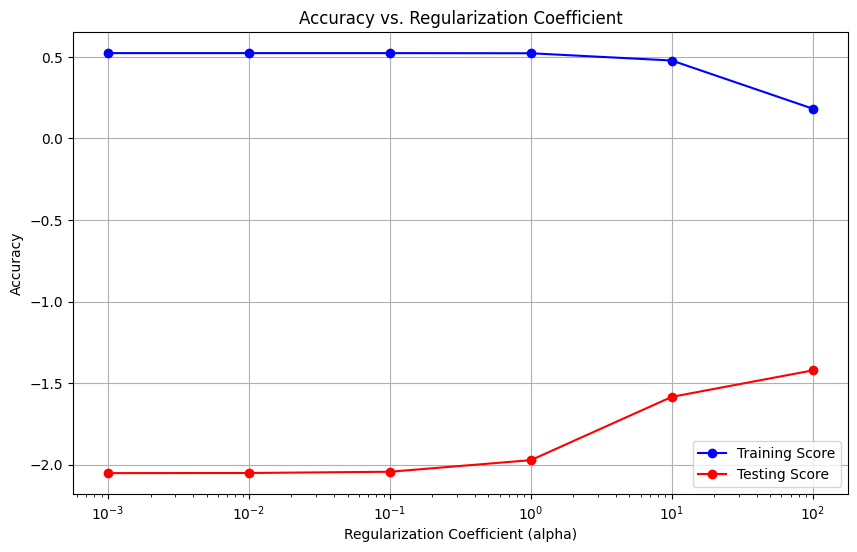

In [ ]:

# Подготовка данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.reshape(-1, 1))

# Создание списка значений параметра регуляризации
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Списки для сохранения точности моделей на обучающей и тестовой выборках
train_scores = []
test_scores = []

# Обучение моделей с разными значениями параметра регуляризации
for alpha in alphas:
    # Создание и обучение модели Ridge
    model = Ridge(alpha=alpha)
    model.fit(X_train_scaled, y_train)
    
    # Оценка точности на обучающей выборке
    train_score = model.score(X_train_scaled, y_train)
    train_scores.append(train_score)
    
    # Оценка точности на тестовой выборке
    test_score = model.score(X_test_scaled, y_test)
    test_scores.append(test_score)

# Построение графиков зависимости точности от коэффициента регуляризации
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_scores, label='Training Score', marker='o', color='blue')
plt.plot(alphas, test_scores, label='Testing Score', marker='o', color='red')
plt.xlabel('Regularization Coefficient (alpha)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Regularization Coefficient')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

